# A/B Testing Example

## Import Packages

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

## Import Data and Inspect Data

In [27]:
ad_clicks = pd.read_csv('ad_clicks.csv')
print(ad_clicks.head())
print(ad_clicks.info())

                                user_id utm_source           day  \
0  008b7c6c-7272-471e-b90e-930d548bd8d7     google  6 - Saturday   
1  009abb94-5e14-4b6c-bb1c-4f4df7aa7557   facebook    7 - Sunday   
2  00f5d532-ed58-4570-b6d2-768df5f41aed    twitter   2 - Tuesday   
3  011adc64-0f44-4fd9-a0bb-f1506d2ad439     google   2 - Tuesday   
4  012137e6-7ae7-4649-af68-205b4702169c   facebook    7 - Sunday   

  ad_click_timestamp experimental_group  
0               7:18                  A  
1                NaN                  B  
2                NaN                  A  
3                NaN                  B  
4                NaN                  B  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             1654 non-null   object
 1   utm_source          1654 non-null   object
 2   day                 1654 non-null   

Our data contains 1654 rows and 5 columns.  For the ad_click_timestamp we have null values that indicate our ad was not clicked on and therefore does not have a clicked timestamp.

## Analyze Data

### Calculate Number of Views from Each utm_source

----- User views by utm_source -----
  utm_source  user_id
0      email      255
1   facebook      504
2     google      680
3    twitter      215


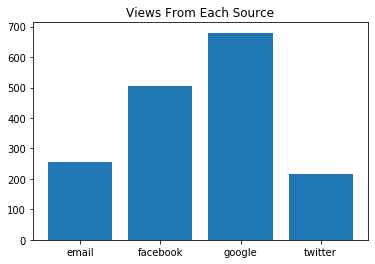

In [37]:
## Find Number of Views from each source and save as views
views = ad_clicks.groupby('utm_source').user_id.count().reset_index()
print("-"*5, "User views by utm_source", "-"*5)
print(views)

plt.bar(views['utm_source'], views['user_id'])
plt.title('Views From Each Source')
plt.show()

We have the greated number of views from google and then facebook, and the least from twitter.  But how does this translate to the number of clicks our ads are getting on each site?

### Find Percent of People who Clicked on an Ad from each utm_source

----- Percent of users that clicked on ad by utm_source -----
is_click utm_source  False  True  percent_clicked
0             email    175    80         0.313725
1          facebook    324   180         0.357143
2            google    441   239         0.351471
3           twitter    149    66         0.306977


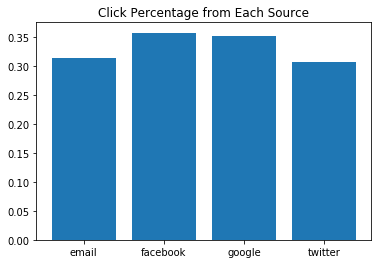

In [48]:
## Make a new column to indicate which ads were clicked on
ad_clicks['is_click'] = ~ad_clicks.ad_click_timestamp.isnull()
#print(ad_clicks.head())

## Create clicks by source
clicks_by_source = ad_clicks.groupby(['utm_source', 'is_click']).user_id.count().reset_index()

## Create pivot table of clicks, source, and percent clicked
clicks_pivot = clicks_by_source.pivot(columns = "is_click", index = "utm_source", values = "user_id").reset_index()
clicks_pivot['percent_clicked'] = clicks_pivot[True] / (clicks_pivot[True] + clicks_pivot[False])
print("-"*5, "Percent of users that clicked on ad by utm_source", "-"*5)
print(clicks_pivot)

plt.bar(clicks_pivot['utm_source'], clicks_pivot['percent_clicked'])
plt.title("Click Percentage from Each Source")
plt.show()

It seems like we get the most clicks from facebook and google, with twitter returning the least amount of clicks based on the percent of total amount of people who saw the ad from each source.

### Calculate A/B Experimental Group Click Percentages

----- Number of users who clicked vs. those who didn't in each test -----
  experimental_group  is_click  user_id
0                  A     False      517
1                  A      True      310
2                  B     False      572
3                  B      True      255

----- Percent of users who clicked each ad type -----
is_click experimental_group  False  True  percent_clicked
0                         A    517   310         0.374849
1                         B    572   255         0.308343


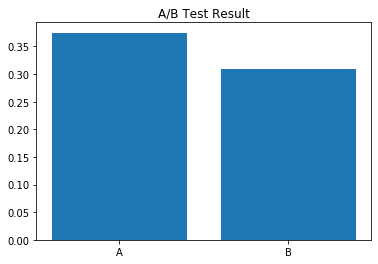

In [47]:
## 
ads = ad_clicks.groupby('experimental_group').user_id.count().reset_index
#print(ads)
ab_click = ad_clicks.groupby(['experimental_group', 'is_click']).user_id.count().reset_index()
ab_click_pivot = ab_click.pivot(columns = "is_click", index = "experimental_group", values = "user_id").reset_index()
ab_click_pivot['percent_clicked'] = ab_click_pivot[True] / (ab_click_pivot[True] + ab_click_pivot[False])

print("-"*5, "Number of users who clicked vs. those who didn't in each test", "-"*5)
print(ab_click)
print()
print("-"*5, "Percent of users who clicked each ad type", "-"*5)
print(ab_click_pivot)

plt.bar(ab_click_pivot['experimental_group'], ab_click_pivot['percent_clicked'])
plt.title('A/B Test Result')
plt.show()

Ad A was more successful than ad B by about 7%.  But can we further break this analysis down?

### A/B Test by Day of the Week

----- Total Ad Click Percentage by Day -----
is_click            day  False  True  click_rate
0            1 - Monday    151    75    0.331858
1           2 - Tuesday    150    88    0.369748
2         3 - Wednesday    175    73    0.294355
3          4 - Thursday    156    76    0.327586
4            5 - Friday    167    89    0.347656
5          6 - Saturday    149    87    0.368644
6            7 - Sunday    141    77    0.353211



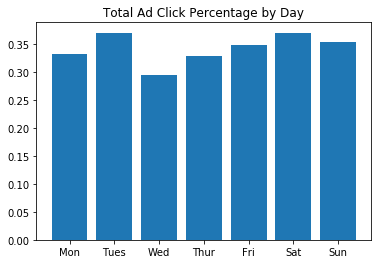

----- Ad A Click Percentage by Day -----
is_click            day  False  True  click_rate
0            1 - Monday     70    43    0.380531
1           2 - Tuesday     76    43    0.361345
2         3 - Wednesday     86    38    0.306452
3          4 - Thursday     69    47    0.405172
4            5 - Friday     77    51    0.398438
5          6 - Saturday     73    45    0.381356
6            7 - Sunday     66    43    0.394495



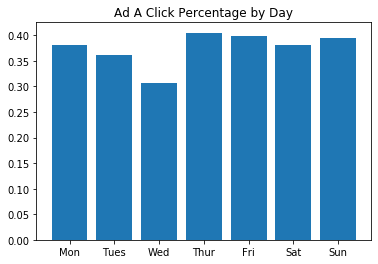

----- Ad B Click Percentage by Day -----
is_click            day  False  True  click_rate
0            1 - Monday     81    32    0.283186
1           2 - Tuesday     74    45    0.378151
2         3 - Wednesday     89    35    0.282258
3          4 - Thursday     87    29    0.250000
4            5 - Friday     90    38    0.296875
5          6 - Saturday     76    42    0.355932
6            7 - Sunday     75    34    0.311927


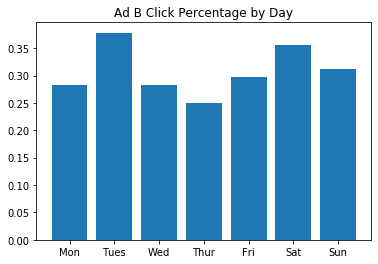

In [53]:
## Create variables for each ad type
a_clicks = ad_clicks[ad_clicks.experimental_group == "A"]
b_clicks = ad_clicks[ad_clicks.experimental_group == "B"]
days = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
## Calculate number of clicks per day
## total
total_clicks_day = ad_clicks.groupby(['day', 'is_click']).user_id.count().reset_index()
total_clicks_day_pivot = total_clicks_day.pivot(columns = 'is_click', index = 'day', values = 'user_id').reset_index()
total_clicks_day_pivot['click_rate'] = total_clicks_day_pivot[True]/(total_clicks_day_pivot[True] + total_clicks_day_pivot[False])
print("-"*5, "Total Ad Click Percentage by Day", "-"*5)
print(total_clicks_day_pivot)
print()
plt.bar(days, total_clicks_day_pivot['click_rate'])
plt.title('Total Ad Click Percentage by Day')
plt.show()

## ad A
a_clicks_day = a_clicks.groupby(['day', 'is_click']).user_id.count().reset_index()
a_clicks_day_pivot = a_clicks_day.pivot(columns = "is_click", index = "day", values = "user_id").reset_index()
a_clicks_day_pivot['click_rate'] = a_clicks_day_pivot[True] /(a_clicks_day_pivot[True] + a_clicks_day_pivot[False])
print("-"*5, "Ad A Click Percentage by Day", "-"*5)
print(a_clicks_day_pivot)
print()
plt.bar(days, a_clicks_day_pivot['click_rate'])
plt.title('Ad A Click Percentage by Day')
plt.show()

## ad B
b_clicks_day = b_clicks.groupby(['day', 'is_click']).user_id.count().reset_index()
b_clicks_day_pivot = b_clicks_day.pivot(columns = "is_click", index = "day", values = "user_id").reset_index()
b_clicks_day_pivot['click_rate'] = b_clicks_day_pivot[True] /(b_clicks_day_pivot[True] + b_clicks_day_pivot[False])
print("-"*5, "Ad B Click Percentage by Day", "-"*5)
print(b_clicks_day_pivot)
plt.bar(days, b_clicks_day_pivot['click_rate'])
plt.title('Ad B Click Percentage by Day')
plt.show()

#print(ad_clicks.head())

In general, we get the highest amount of clicks from ads on Tuesday and Saturday and the least on Wednesday.  However, once we break that down by ad type we notice ad A did best on Thursday, Friday, and Sunday while ad B did best Tuesday and Saturday.  Ad B actually did better than ad A on Tuesday.  Looking into a strategy on using ad B on Tuesdays or a mix of ad A and B on Tuesdays and Saturdays might be worth considering.